In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 设置主题
sns.set(color_codes=True)
# 生成高斯数据
# 正态分布（Normal distribution），也称“常态分布”，又名高斯分布（Gaussian distribution）
np.random.seed(sum(map(ord,'distributions'))) 

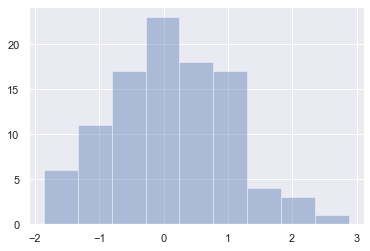

In [3]:
x=np.random.normal(size=100)
sns.distplot(x,kde=False)

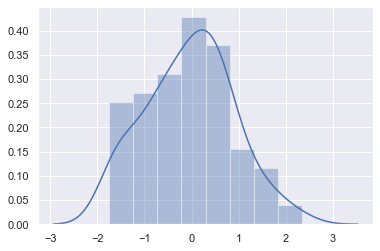

In [4]:
x=np.random.normal(size=100)
sns.distplot(x,kde=True)

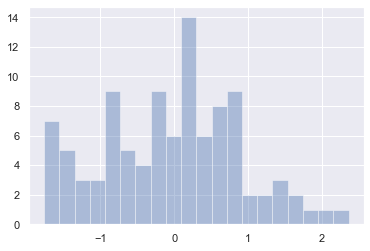

In [5]:
sns.distplot(x,bins=20,kde=False)

### 数据分布状况

In [9]:
mean,cov=[0,1],[(1,0.5),(0.5,1)]
data=np.random.multivariate_normal(mean,cov,200)
df=pd.DataFrame(data,columns=['x','y'])
df

,x,y
0,-0.602564,0.434820
1,-0.839219,-0.949061
2,-1.283694,-0.133810
3,0.604825,1.678092
4,-1.713887,-0.676030
...,...,...
195,-0.928330,0.304121
196,0.409524,1.801255
197,0.111166,0.210871
198,-0.658720,0.875370


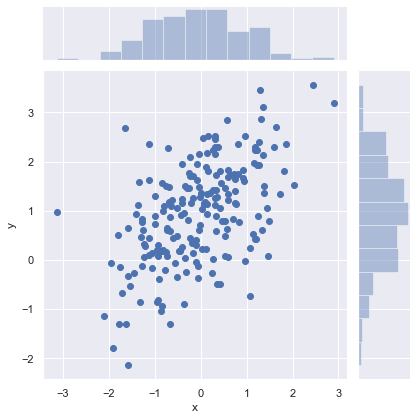

In [10]:
# 观测两个变量之间关系
sns.jointplot(x='x',y='y',data=df)

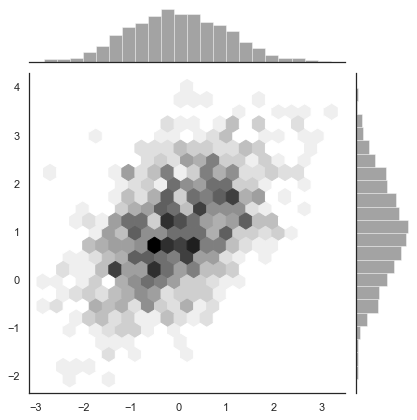

In [17]:
x,y=np.random.multivariate_normal(mean,cov,1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x,y=y,kind='hex',color='k')

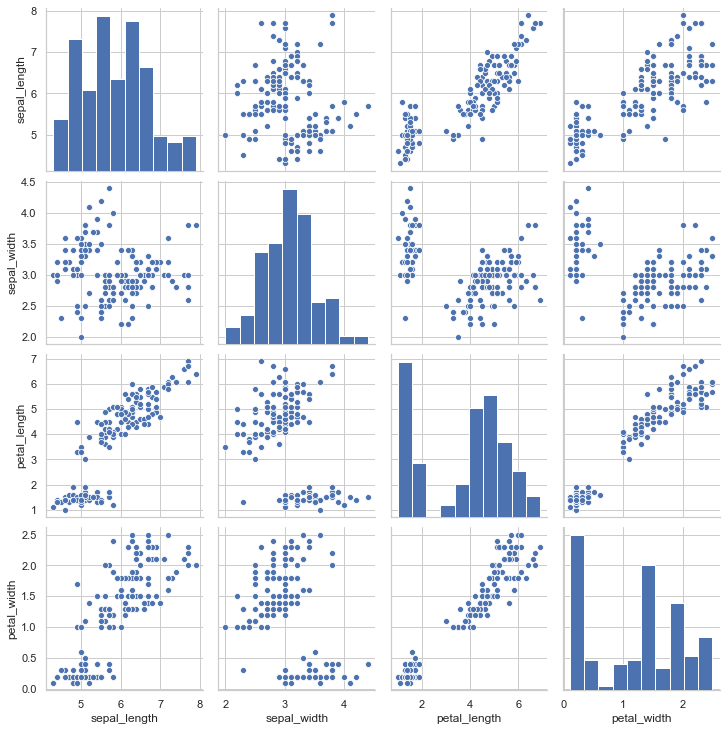

In [39]:
iris=sns.load_dataset('iris')
sns.set_style('whitegrid')
# sns.set_context('paper')
sns.pairplot(iris)

In [4]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 回归分析图  
### regplot()和implot()都可以画回归关系图

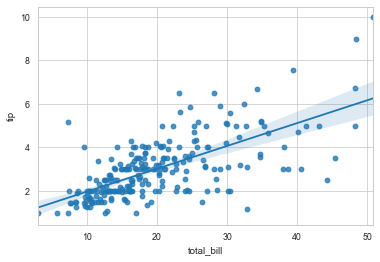

In [9]:
sns.regplot(x='total_bill',y='tip',data=tips)

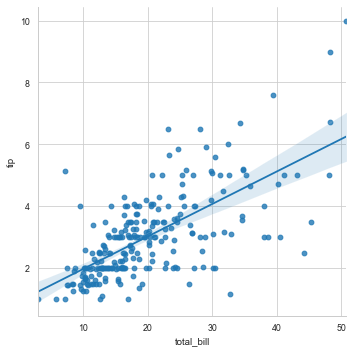

In [10]:
sns.lmplot(x='total_bill',y='tip',data=tips)

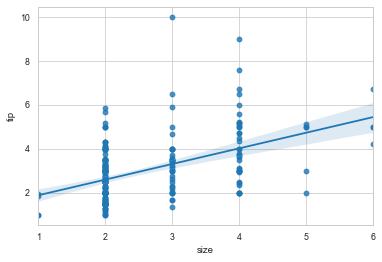

In [7]:
sns.set_context('paper')
sns.regplot(data=tips,x='size',y='tip')

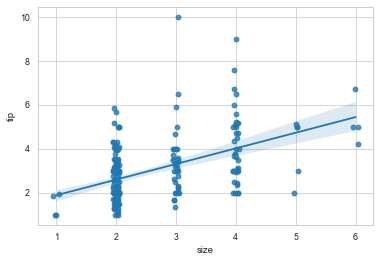

In [8]:
sns.regplot(data=tips,x='size',y='tip',x_jitter=0.05) # x_jitter 数据进行抖动

## 多变量分析图

In [29]:
sns.set(style='whitegrid',color_codes=True)
np.random.seed(sum(map(ord,'categorical')))

titanic=sns.load_dataset('titanic')

stripplot的作图原理就是按照x属性所对应的类别分别展示y属性的值，适用于分类数据。  
下图就是不同饭点的账单总金额的散点图。

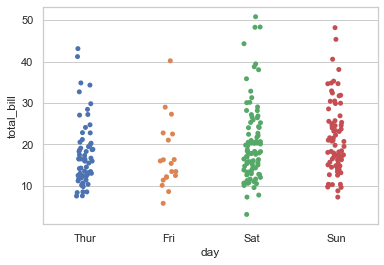

In [7]:
sns.stripplot(x='day',y='total_bill',data=tips)

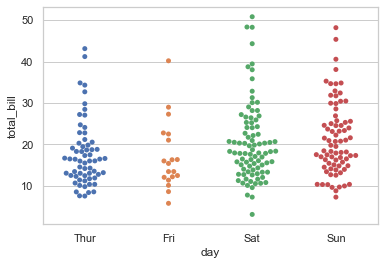

In [8]:
sns.swarmplot(x='day',y='total_bill',data=tips)

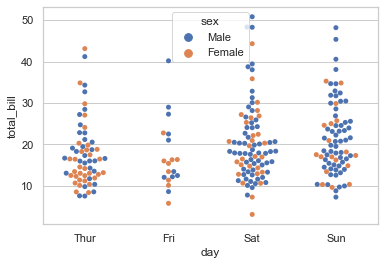

In [11]:
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips)

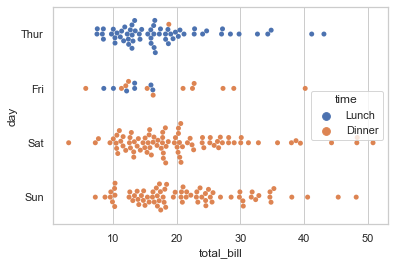

In [13]:
sns.swarmplot(y='day',x='total_bill',hue='time',data=tips)

## 盒图  
IQR统计学四分位距，第一/四分位与第三/第四分位之间的距离

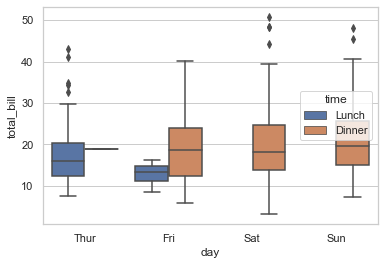

In [18]:
# 菱形代表离群点
sns.boxplot(x='day',y='total_bill',hue='time',data=tips)

对于箱型图来说，使用hue参数的假设是这个变量嵌套在x或者y轴内。所以默认的情况下hue变量的不同  
型值会保持偏置状态（两类或几类数据共同在x轴数据类型的一个类中），就像上面那个图所示。但是如果hue  
所使用的变量不是嵌套的，那么你可以使用 dodge 参数来禁止这个默认的偏置状态。

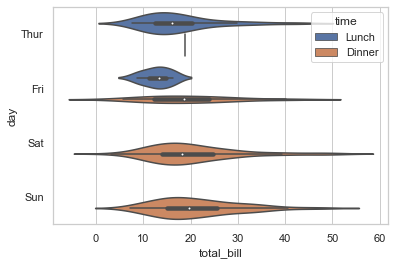

In [20]:
sns.violinplot(y='day',x='total_bill',hue='time',data=tips)

这种方法使用核密度估计来更好地描述值的分布。此外，小提琴内还显示了箱体四分位数和四分位距。由于小  
琴使用KDE，还有一些其他可以调整的参数

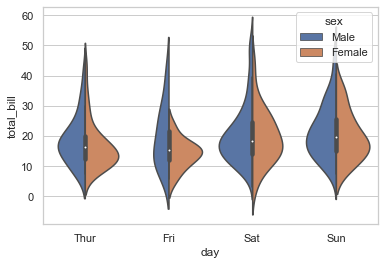

In [23]:
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,split=True)

当 hue 的嵌套类型只有两类的时候，也可以使用split 参数将小提琴分割

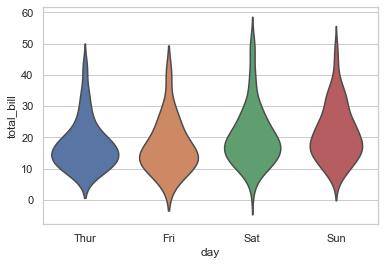

In [25]:
# 组合
sns.violinplot(x='day',y='total_bill',data=tips,inner=None)

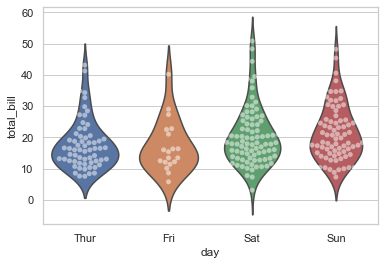

In [28]:
sns.violinplot(x='day',y='total_bill',data=tips,inner=None)
sns.swarmplot(x='day',y='total_bill',data=tips,color='w',alpha=0.5)

条形图

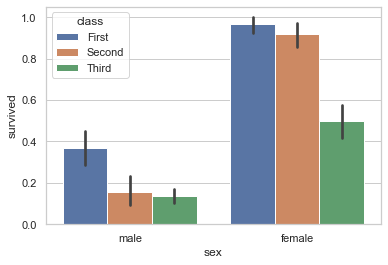

In [31]:
 sns.barplot(x='sex',y='survived',hue='class',data=titanic)

点图，看差异

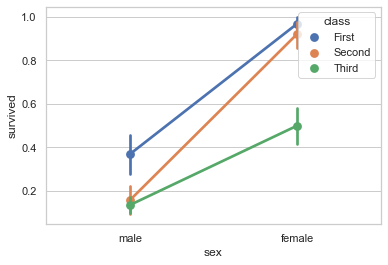

In [32]:
sns.pointplot(x='sex',y='survived',hue='class',data=titanic)

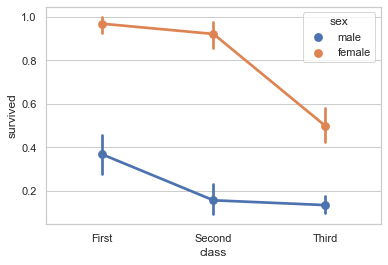

In [35]:
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,paletee={'male':'g','female':'m'})

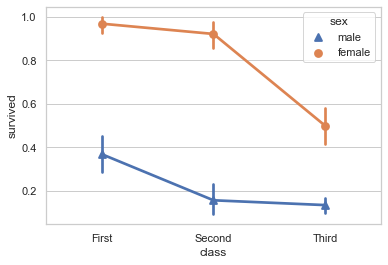

In [36]:
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,paletee={'male':'g','female':'m'},markers=['^','o'])

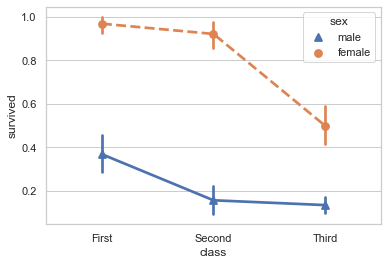

In [37]:
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,paletee={'male':'g','female':'m'},markers=['^','o'],linestyles=['-','--'])

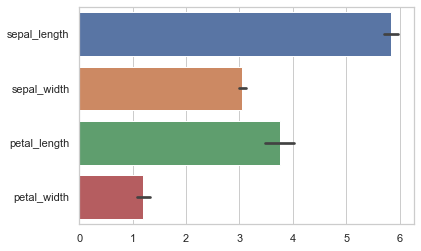

In [40]:
sns.barplot(data=iris,orient='h')

## 多层面板分类图

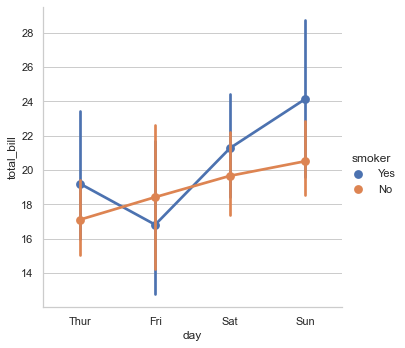

In [41]:
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips)

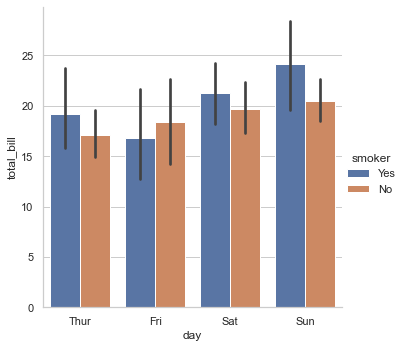

In [42]:
 sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips,kind='bar')

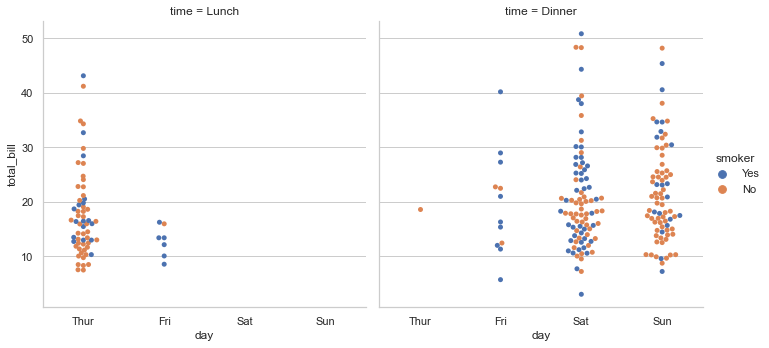

In [43]:
 sns.factorplot(x='day',y='total_bill',hue='smoker',col='time',data=tips,kind='swarm')

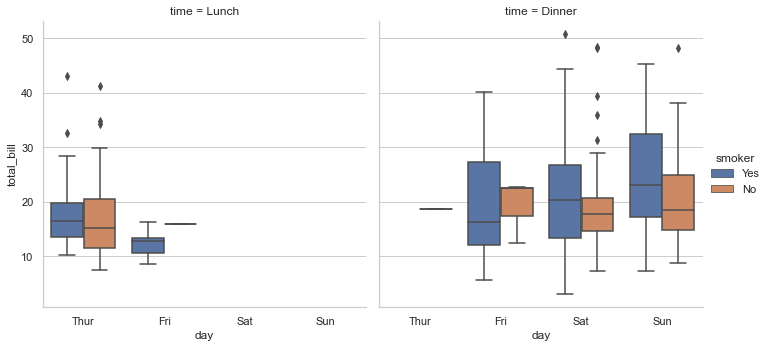

In [44]:
 sns.factorplot(x='day',y='total_bill',hue='smoker',col='time',data=tips,kind='box')

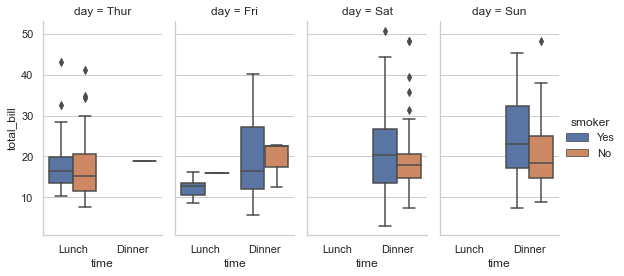

In [49]:
 # col参数指定按XX进行分栏
 sns.factorplot(x='time',y='total_bill',hue='smoker',col='day',data=tips,kind='box',size=4,aspect=0.5)